In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

+ Download dữ liệu CIFAR10 sau đó chia thành 2 tập dữ liệu train và validation.
+ Chuẩn hóa dữ liệu với mean = 0.5 và std = 0.5

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean = (0.5, ), std = (0.5, ))])
trainset = torchvision.datasets.CIFAR10(root='D:/Downloads/DecisionTree_RandomForest', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, num_workers=8, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='D:/Downloads/DecisionTree_RandomForest', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, num_workers=8, shuffle=False)


100%|██████████| 170M/170M [00:02<00:00, 78.4MB/s]


Extracting D:/Downloads/DecisionTree_RandomForest/cifar-10-python.tar.gz to D:/Downloads/DecisionTree_RandomForest


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Files already downloaded and verified


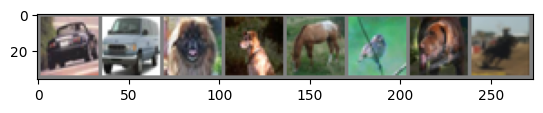

In [4]:
def imshow(img):
    img = img * 0.5 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

for i, (images, labels) in enumerate(trainloader, 0):
    imshow(torchvision.utils.make_grid(images[:8]))
    break

+ Xây dựng model MLP cơ bản để train tập dữ liệu CIFAR10

In [5]:
def getModel(n_features):
    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(n_features, 256),
        nn.ReLU(),
        nn.Linear(256, 10)
    )
    return model

+ Khởi tạo hàm loss function và phương thức optimizer

In [6]:
n_features = 32 * 32 * 3# Đối với ảnh trong tập FashionMNIST thì size ảnh là 28x28 => Số lượng feature trong ảnh là 28 * 28 = 784
model = getModel(n_features)
lr = 0.01
optim = SGD(params = model.parameters(), lr = lr)
loss_fn = nn.CrossEntropyLoss()
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

+ Xây dựng hàm đánh giá model

In [7]:
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy


+ Bắt đầu training và đánh giá model.

In [8]:
n_epochs = 100
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
	running_loss = 0.0
	running_correct = 0
	total = 0
	model.train()
	for i, (inputs, labels) in enumerate(trainloader, 0):
		inputs, labels = inputs.to(device), labels.to(device)

		optim.zero_grad()

		outputs = model(inputs)
		loss = loss_fn(outputs, labels)
		loss.backward()
		optim.step()

		running_loss += loss.item()
		_, predicted = torch.max(outputs.data, 1)
		total += labels.size(0)
		running_correct += (predicted == labels).sum().item()

	epoch_accuracy = 100 * running_correct / total
	epoch_loss = running_loss / (i + 1)
	test_loss, test_accuracy = evaluate(model, testloader, loss_fn)
	print(f"Epoch [{epoch + 1}/{n_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

	train_losses.append(epoch_loss)
	train_accuracies.append(epoch_accuracy)
	test_losses.append(test_loss)
	test_accuracies.append(test_accuracy)

Epoch [1/100], Loss: 1.8831, Accuracy: 34.39%, Test Loss: 1.7211, Test Accuracy: 40.30%
Epoch [2/100], Loss: 1.6634, Accuracy: 42.36%, Test Loss: 1.6133, Test Accuracy: 44.08%
Epoch [3/100], Loss: 1.5800, Accuracy: 45.00%, Test Loss: 1.5572, Test Accuracy: 45.75%
Epoch [4/100], Loss: 1.5248, Accuracy: 47.08%, Test Loss: 1.5221, Test Accuracy: 46.96%
Epoch [5/100], Loss: 1.4809, Accuracy: 48.83%, Test Loss: 1.4919, Test Accuracy: 48.05%
Epoch [6/100], Loss: 1.4431, Accuracy: 50.16%, Test Loss: 1.4680, Test Accuracy: 48.81%
Epoch [7/100], Loss: 1.4089, Accuracy: 51.41%, Test Loss: 1.4484, Test Accuracy: 49.61%
Epoch [8/100], Loss: 1.3764, Accuracy: 52.68%, Test Loss: 1.4238, Test Accuracy: 50.14%
Epoch [9/100], Loss: 1.3477, Accuracy: 53.49%, Test Loss: 1.4141, Test Accuracy: 50.64%
Epoch [10/100], Loss: 1.3194, Accuracy: 54.74%, Test Loss: 1.3964, Test Accuracy: 51.28%
Epoch [11/100], Loss: 1.2931, Accuracy: 55.55%, Test Loss: 1.3804, Test Accuracy: 51.58%
Epoch [12/100], Loss: 1.2686, 

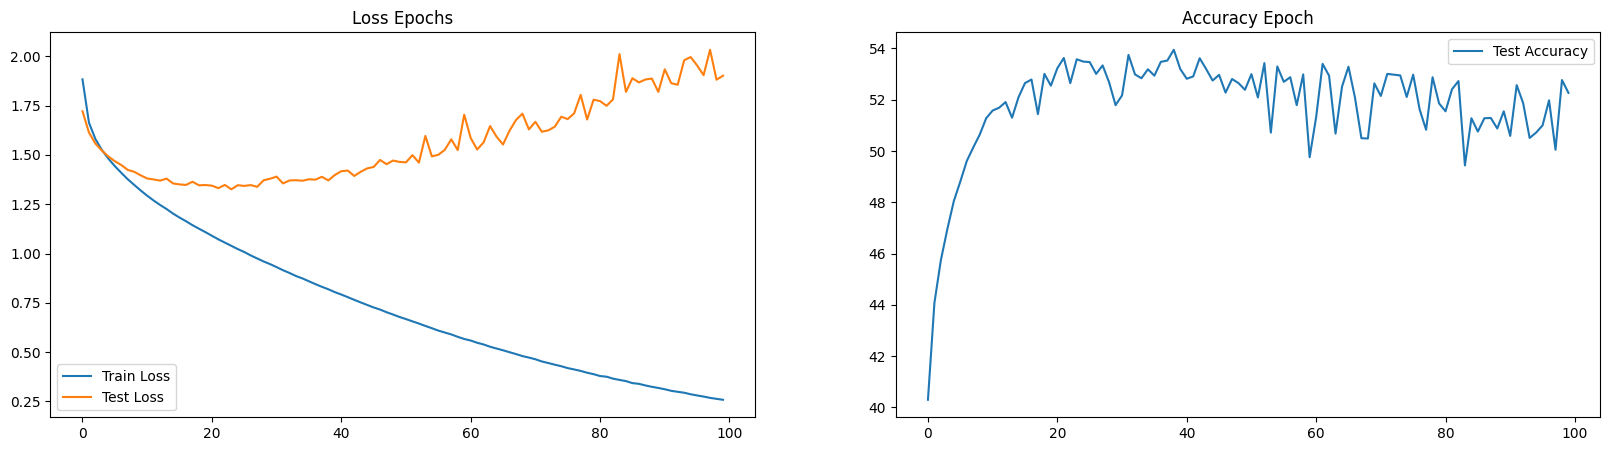

In [15]:
plt.figure(figsize = (20, 5))
plt.subplot(121)
plt.title('Loss Epochs')
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy Epoch')
plt.plot(test_accuracies, label = 'Test Accuracy')
plt.legend()

+ Dưới đây là bài tập về code from scratch

In [16]:
def zScoreScaling(tensor):
  mean = tensor.mean(axis=0, keepdims=True)
  std = tensor.std(axis=0, keepdims=True)
  return (tensor - mean) / std

In [17]:
def minMaxScaling(tensor):
  min = tensor.min(axis=0, keepdims=True).values
  max = tensor.max(axis=0, keepdims=True).values
  return (tensor - min) / (max - min)

In [18]:
class Linear:
  def __init__(self, in_features, out_features):
    self.weight = torch.randn(in_features, out_features)
    self.bias = torch.randn(1, out_features)

  def forward(self, x):
    return x @ self.weight + self.bias


In [19]:
tensor = torch.tensor([
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0],
    [7.0, 8.0, 9.0]
])
zscore = zScoreScaling(tensor)
min_max = minMaxScaling(tensor)
print(zscore)
print(min_max)


tensor([[-1., -1., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]])
tensor([[0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.5000],
        [1.0000, 1.0000, 1.0000]])


![image.png](attachment:image.png)

In [20]:
tensor = torch.tensor([1.0, 2.0, 3.0])
linear = Linear(3, 2)
out = linear.forward(tensor)
print(out)
print(f"Weight = {linear.weight}")
print(f"Bias = {linear.bias}")

tensor([[ 0.8811, -0.0085]])
Weight = tensor([[-0.6036,  0.5633],
        [ 0.3870,  0.8505],
        [ 0.0822, -0.6151]])
Bias = tensor([[ 0.4641, -0.4275]])
